# Exploratory Data Analysis

In [36]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data path
data_path = "../data"

## Output Data

In [3]:
output = pd.read_csv(os.path.join(data_path, "full_submission.csv"))

In [6]:
# check the distribution of the target
output.describe()

,Id,Cover_Type
count,581012.000000,581012.000000
mean,290506.500000,3.997394
std,167723.861639,1.998180
min,1.000000,1.000000
25%,145253.750000,2.000000
50%,290506.500000,4.000000
75%,435759.250000,6.000000
max,581012.000000,7.000000


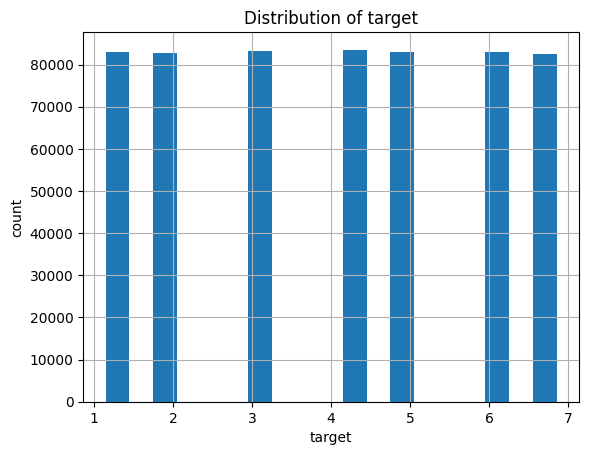

In [17]:
output.Cover_Type.hist(rwidth=0.5)
plt.title("Distribution of target")
plt.xlabel("target")
plt.ylabel("count");

## Data

In [5]:
df_train = pd.read_csv(os.path.join(data_path, "train.csv"))
df_test = pd.read_csv(os.path.join(data_path, "test-full.csv"))

In [18]:
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,...,0.043849,0.040939,0.001190,0.006812,0.000926,0.002116,0.049206,0.041931,0.030159,4.000000
std,179261.722330,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,...,0.204766,0.198156,0.034484,0.082257,0.030416,0.045957,0.216306,0.200439,0.171030,2.000066
min,5.000000,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,103705.000000,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,276034.500000,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,398150.250000,3109.000000,257.000000,22.000000,330.000000,80.000000,2292.000000,236.000000,235.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,581005.000000,3850.000000,360.000000,50.000000,1376.000000,570.000000,6803.000000,254.000000,254.000000,251.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [34]:
# Check if stratified sampling has already been done for the training set 
df_train.Cover_Type.value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

In [22]:
df_test.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,290506.500000,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,167723.861639,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145253.750000,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,290506.500000,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,435759.250000,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,581012.000000,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train/Test size difference

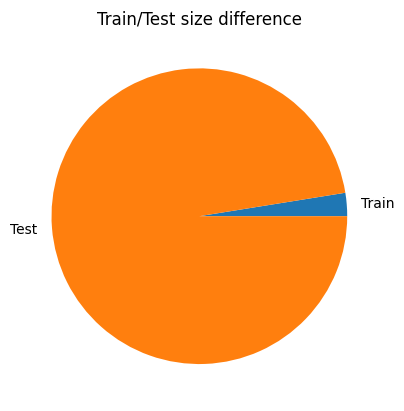

In [33]:
temp = pd.DataFrame({"Dataset": ["Train", "Test"], "Number of Records": [df_train.shape[0], df_test.shape[0]]})
plt.pie(temp["Number of Records"], labels=temp["Dataset"])
plt.title("Train/Test size difference");

## Correlations

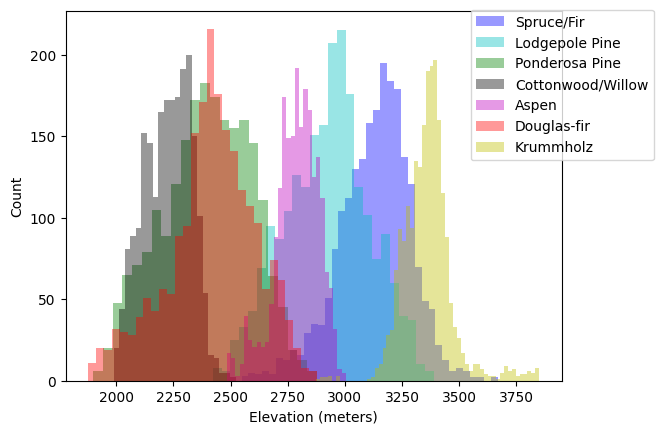

In [53]:
# Plot an Elevation's histogram for each Cover Type to check for class separation

elevations = df_train.loc[:, ['Elevation', 'Cover_Type']]

# Dictionary for mapping each integer target label to its string value
covtype_label_name_dict = {1: 'Spruce/Fir',
                           2: 'Lodgepole Pine',
                           3: 'Ponderosa Pine',
                           4: 'Cottonwood/Willow',
                           5: 'Aspen',
                           6: 'Douglas-fir',
                           7: 'Krummholz'}

custom_palette = ['b', 'c', 'g', 'k', 'm', 'r', 'y']


# Iterate through the dictionary to plot a histogram for each cover type
for covtype_id, covtype_name in covtype_label_name_dict.items():
    palette_idx = covtype_id - 1        
    by_one_covtype = elevations.groupby('Cover_Type') \
                                    .apply(lambda x: x[ x['Cover_Type'] == covtype_id ])
    ax = sns.histplot(by_one_covtype.Elevation,
                        color=custom_palette[palette_idx], label=covtype_name, kde=False,
                        alpha=0.4, linewidth=0)

plt.legend(loc='right', bbox_to_anchor=(1.2, 0.8))
ax.set(xlabel='Elevation (meters)', ylabel='Count')
plt.show()

# 4 (Willow), 5 (Aspen) and 7 (Krummholz) are easily separable

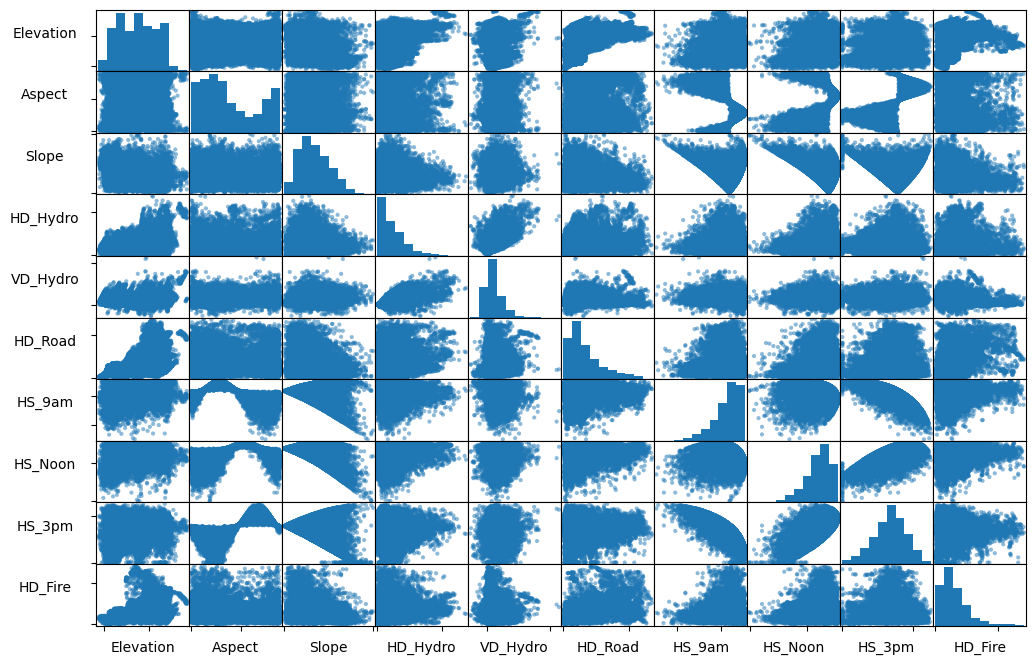

In [59]:
features = ['Elevation', 'Aspect',
            'Slope',
            'Horizontal_Distance_To_Hydrology',
            'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways',
            'Hillshade_9am', 'Hillshade_Noon',
            'Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
labels = ['Elevation', 'Aspect',
            'Slope', 'HD_Hydro',
            'VD_Hydro', 'HD_Road',
            'HS_9am', 'HS_Noon',
            'HS_3pm', 'HD_Fire']
            
shorter_labels = dict(zip(features, labels))

corr_train = df_train[features].copy()
corr_train.rename(columns=shorter_labels, inplace=True)
axes= pd.plotting.scatter_matrix(corr_train, figsize=(12, 8))

for ax in axes.flatten():
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.labelpad=30
    ax.set_yticklabels([])
    ax.set_xticklabels([])

Let's study the most correlated couples